In [2]:
import numpy as np
import pandas as pd
import sqlite3
import optuna
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import japanize_matplotlib
from IPython.display import display, HTML


/home/skato/anaconda3/envs/optuna/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df1 = pd.read_csv("log_2024_06_06_18_21_25.csv",
    names = ["n","y","ymax","x0","x1","x0max","x1max","constraints"],
    encoding="SHIFT-JIS")

df2 = pd.read_csv("log_2024_06_06_19_26_54.csv",
    names = ["n","y","ymax","x0","x1","x0max","x1max","constraints"],
    encoding="SHIFT-JIS")

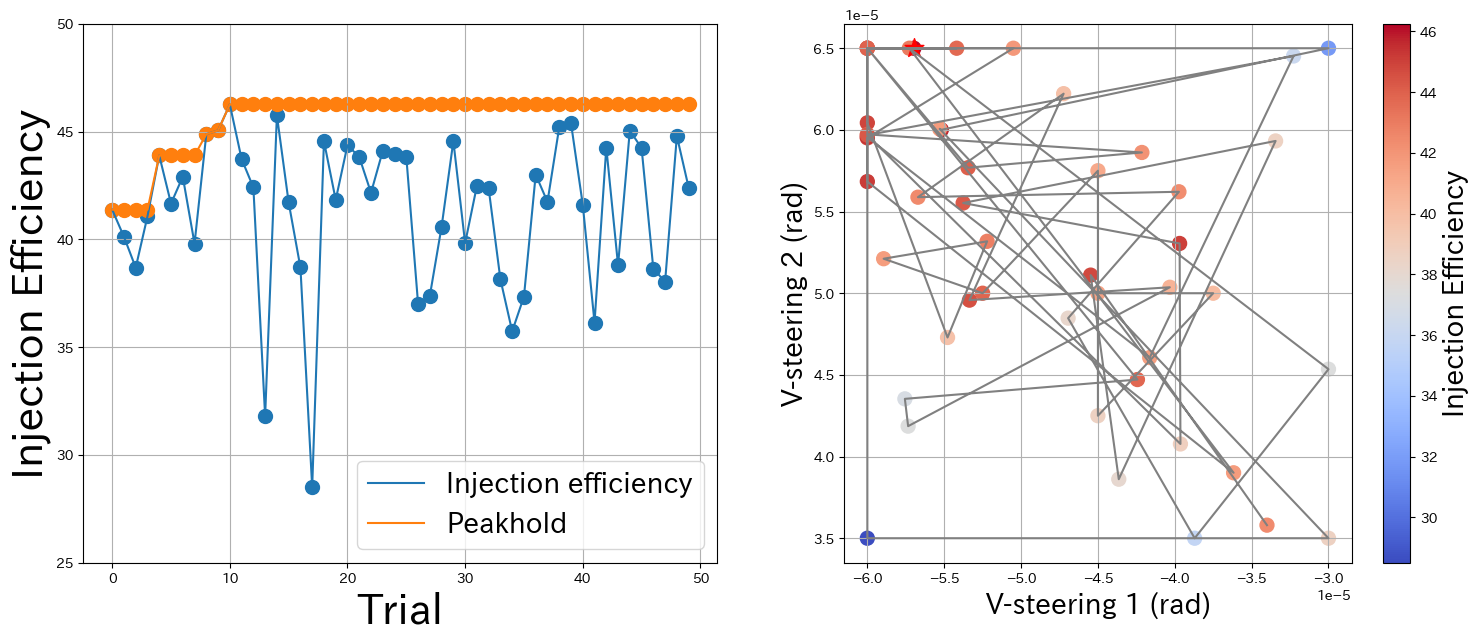

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[18, 7])

ax1.plot(df1["n"], df1["y"], color="tab:blue",label="Injection efficiency")  # 線を描写
ax1.scatter(df1["n"], df1["y"], color="tab:blue", s=100)  # 点を描写
ax1.plot(df1["n"], df1["ymax"], color="tab:orange",label="Peakhold")
ax1.scatter(df1["n"], df1["ymax"], color="tab:orange", s=100)

ax1.set_ylim(25, 50)
ax1.set_xlabel('Trial', fontsize=30)
ax1.set_ylabel('Injection Efficiency', fontsize=30)
ax1.grid()

# 凡例の追加
ax1.legend(fontsize=20)

# 点にマーカーをつけずに線のみを引く
ax2.plot(df1["x0"], df1["x1"], marker='', linestyle='-', color='gray')

# scatterプロットで、各点に色をつける
sc = ax2.scatter(df1["x0"], df1["x1"], c=df1["y"], cmap="coolwarm", marker='o',s=100)

# 最終行のx0maxとx1maxのマーカーを星に変更
last_row = df1.iloc[-1]
ax2.scatter(last_row["x0max"], last_row["x1max"], c='red', marker='*', s=200, label='Max Point')

# 軸ラベルとフォントサイズの設定
ax2.set_xlabel("V-steering 1 (rad)", fontsize=20)
ax2.set_ylabel("V-steering 2 (rad)", fontsize=20)

# グリッドの表示
ax2.grid(True)

# カラーバーの追加
cbar = fig.colorbar(sc, ax=ax2)
cbar.set_label('Injection Efficiency', fontsize=20)


# グラフの表示
plt.show()

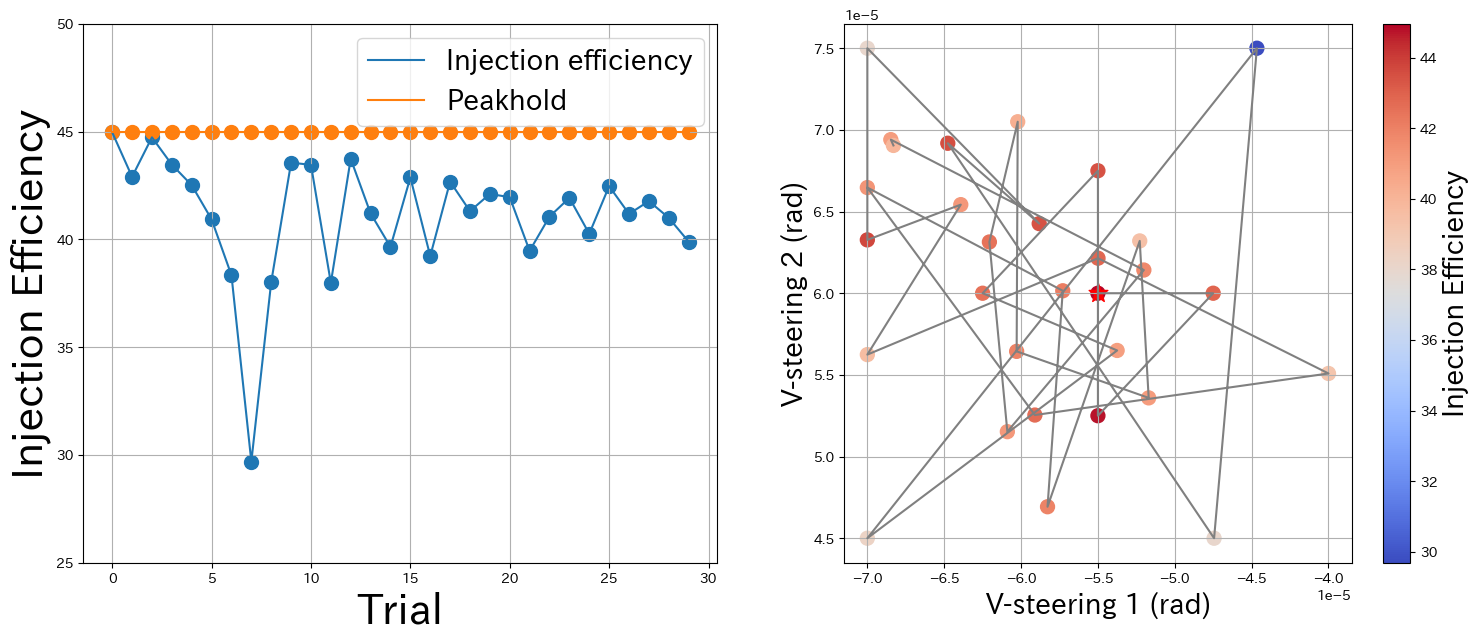

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[18, 7])

ax1.plot(df2["n"], df2["y"], color="tab:blue",label="Injection efficiency")  # 線を描写
ax1.scatter(df2["n"], df2["y"], color="tab:blue", s=100)  # 点を描写
ax1.plot(df2["n"], df2["ymax"], color="tab:orange",label="Peakhold")
ax1.scatter(df2["n"], df2["ymax"], color="tab:orange", s=100)

ax1.set_ylim(25, 50)
ax1.set_xlabel('Trial', fontsize=30)
ax1.set_ylabel('Injection Efficiency', fontsize=30)
ax1.grid()

# 凡例の追加
ax1.legend(fontsize=20)

# 点にマーカーをつけずに線のみを引く
ax2.plot(df2["x0"], df2["x1"], marker='', linestyle='-', color='gray')

# scatterプロットで、各点に色をつける
sc = ax2.scatter(df2["x0"], df2["x1"], c=df2["y"], cmap="coolwarm", marker='o',s=100)

# 最終行のx0maxとx1maxのマーカーを星に変更
last_row = df2.iloc[-1]
ax2.scatter(last_row["x0max"], last_row["x1max"], c='red', marker='*', s=200, label='Max Point')

# 軸ラベルとフォントサイズの設定
ax2.set_xlabel("V-steering 1 (rad)", fontsize=20)
ax2.set_ylabel("V-steering 2 (rad)", fontsize=20)

# グリッドの表示
ax2.grid(True)

# カラーバーの追加
cbar = fig.colorbar(sc, ax=ax2)
cbar.set_label('Injection Efficiency', fontsize=20)


# グラフの表示
plt.show()

/tmp/ipykernel_8682/951688394.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([f"{tick:.2f}" for tick in cbar_ticks + 10])


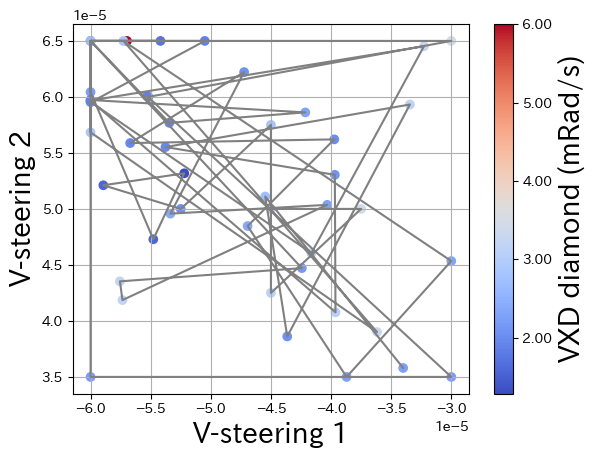

In [8]:
# 点にマーカーをつけずに線のみを引く
plt.plot(df1["x0"], df1["x1"], marker='', linestyle='-', color='gray')

# scatterプロットで、各点に色をつける
plt.scatter(df1["x0"], df1["x1"], c=df1["constraints"], cmap="coolwarm", marker='o',)

# 軸ラベルとフォントサイズの設定
plt.xlabel("V-steering 1", fontsize=20)
plt.ylabel("V-steering 2", fontsize=20)

# グリッドの表示
plt.grid(True)

# カラーバーの追加
cbar = plt.colorbar(label='VXD diamond (mRad/s)')
cbar.ax.yaxis.label.set_size(20)  # カラーバーのフォントサイズを設定

# カラーバーの値を+10する
cbar_ticks = cbar.get_ticks()
cbar.set_ticklabels([f"{tick:.2f}" for tick in cbar_ticks + 10])


# グラフの表示
plt.show()

/tmp/ipykernel_8682/709058110.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels([f"{tick:.2f}" for tick in cbar_ticks + 10])


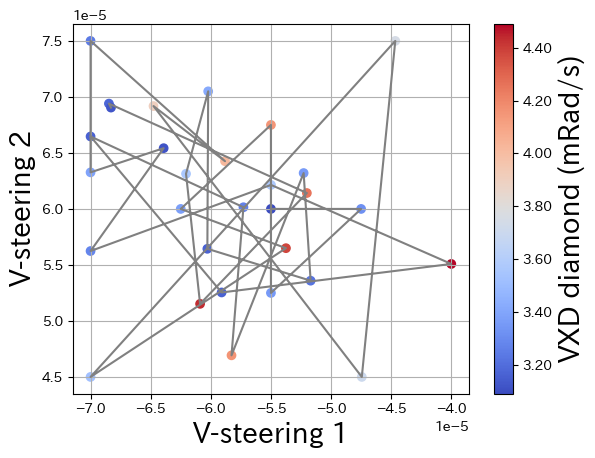

In [9]:
# 点にマーカーをつけずに線のみを引く
plt.plot(df2["x0"], df2["x1"], marker='', linestyle='-', color='gray')

# scatterプロットで、各点に色をつける
plt.scatter(df2["x0"], df2["x1"], c=df2["constraints"], cmap="coolwarm", marker='o',)

# 軸ラベルとフォントサイズの設定
plt.xlabel("V-steering 1", fontsize=20)
plt.ylabel("V-steering 2", fontsize=20)

# グリッドの表示
plt.grid(True)

# カラーバーの追加
cbar = plt.colorbar(label='VXD diamond (mRad/s)')
cbar.ax.yaxis.label.set_size(20)  # カラーバーのフォントサイズを設定

# カラーバーの値を+10する
cbar_ticks = cbar.get_ticks()
cbar.set_ticklabels([f"{tick:.2f}" for tick in cbar_ticks + 10])


# グラフの表示
plt.show()

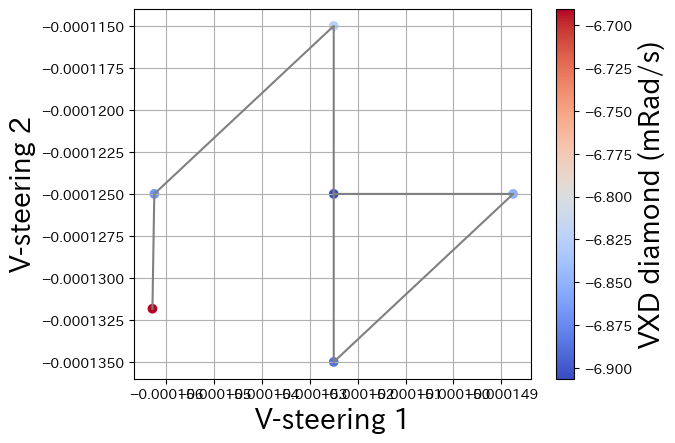

In [ ]:
# 点にマーカーをつけずに線のみを引く
plt.plot(df3["x0"], df3["x1"], marker='', linestyle='-', color='gray')

# scatterプロットで、各点に色をつける
plt.scatter(df3["x0"], df3["x1"], c=df3["constraints"], cmap="coolwarm", marker='o',)

# 軸ラベルとフォントサイズの設定
plt.xlabel("V-steering 1", fontsize=20)
plt.ylabel("V-steering 2", fontsize=20)

# グリッドの表示
plt.grid(True)

# カラーバーの追加
cbar = plt.colorbar(label='VXD diamond (mRad/s)')
cbar.ax.yaxis.label.set_size(20)  # カラーバーのフォントサイズを設定
#cbar.set_ticklabels([f"{tick:.2f}" for tick in cbar_ticks + 10])

# グラフの表示
plt.show()

In [ ]:
df4 = pd.read_csv("VXD_QCS1.csv", 
    encoding="SHIFT-JIS",
    na_values=['N/A'])

# N/Aを前の行の値で埋める
df4.ffill(inplace=True)
df4['Timestamp'] = pd.to_datetime(df4['Timestamp'])
df4['B2_VXD:Rad:Res:BPAtDCU3:A1:DoseRate_Diff'] = df4['B2_VXD:Rad:Res:BPAtDCU3:A1:DoseRate'].diff().fillna(0)

df5 = pd.read_csv("VXD_QCS2.csv", 
    encoding="SHIFT-JIS",
    na_values=['N/A'])

# N/Aを前の行の値で埋める
df5.ffill(inplace=True)
df5['Timestamp'] = pd.to_datetime(df5['Timestamp'])
df5['B2_VXD:Rad:Res:BPAtDCU3:A1:DoseRate_Diff'] = df5['B2_VXD:Rad:Res:BPAtDCU3:A1:DoseRate'].diff().fillna(0)


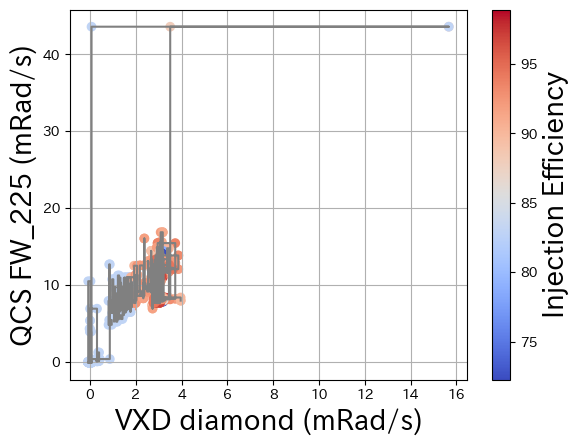

In [ ]:
# 点にマーカーをつけずに線のみを引く
plt.plot(df4["B2_VXD:Rad:Res:BPAtDCU3:A1:DoseRate"], df4["B2_VXD:Rad:QCS_FW_225:DoseRate"], marker='', linestyle='-', color='gray')

# scatterプロットで、各点に色をつける
plt.scatter(df4["B2_VXD:Rad:Res:BPAtDCU3:A1:DoseRate"], df4["B2_VXD:Rad:QCS_FW_225:DoseRate"], c=df4["TM_EVR0:LER:INJ2_EFF:BCM"], cmap="coolwarm", marker='o',)

# 軸ラベルとフォントサイズの設定
plt.xlabel("VXD diamond (mRad/s)", fontsize=20)
plt.ylabel("QCS FW_225 (mRad/s)", fontsize=20)

# グリッドの表示
plt.grid(True)

# カラーバーの追加
cbar = plt.colorbar(label='Injection Efficiency')
cbar.ax.yaxis.label.set_size(20)  # カラーバーのフォントサイズを設定

# グラフの表示
plt.show()

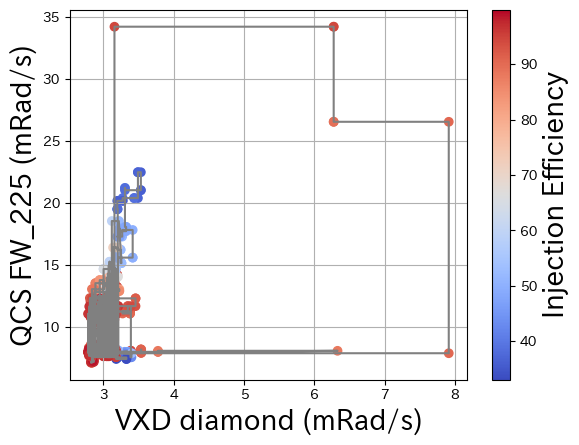

In [ ]:
# 点にマーカーをつけずに線のみを引く
plt.plot(df5["B2_VXD:Rad:Res:BPAtDCU3:A1:DoseRate"], df5["B2_VXD:Rad:QCS_FW_225:DoseRate"], marker='', linestyle='-', color='gray')

# scatterプロットで、各点に色をつける
plt.scatter(df5["B2_VXD:Rad:Res:BPAtDCU3:A1:DoseRate"], df5["B2_VXD:Rad:QCS_FW_225:DoseRate"], c=df5["TM_EVR0:LER:INJ2_EFF:BCM"], cmap="coolwarm", marker='o',)

# 軸ラベルとフォントサイズの設定
plt.xlabel("VXD diamond (mRad/s)", fontsize=20)
plt.ylabel("QCS FW_225 (mRad/s)", fontsize=20)

# グリッドの表示
plt.grid(True)

# カラーバーの追加
cbar = plt.colorbar(label='Injection Efficiency')
cbar.ax.yaxis.label.set_size(20)  # カラーバーのフォントサイズを設定

# グラフの表示
plt.show()

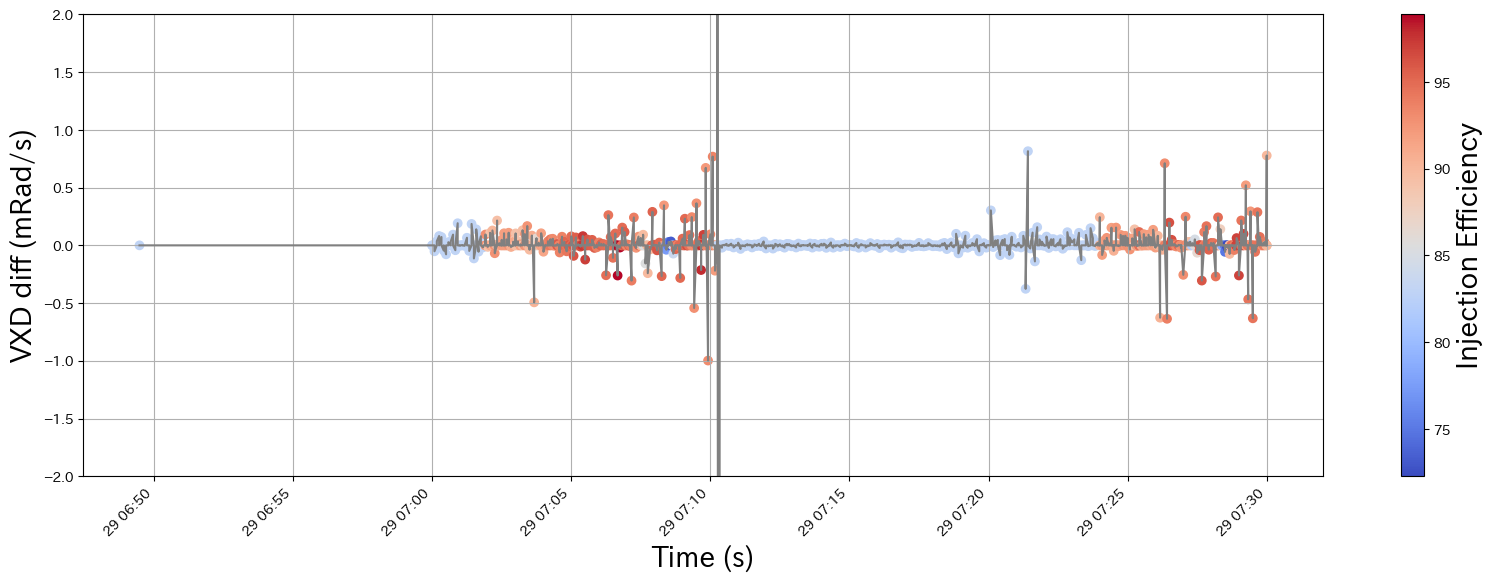

In [ ]:
plt.figure(figsize=(20, 6))

# 点にマーカーをつけずに線のみを引く
plt.plot(df4["Timestamp"], df4["B2_VXD:Rad:Res:BPAtDCU3:A1:DoseRate_Diff"], marker='', linestyle='-', color='gray')

# scatterプロットで、各点に色をつける
plt.scatter(df4["Timestamp"], df4["B2_VXD:Rad:Res:BPAtDCU3:A1:DoseRate_Diff"], c=df4["TM_EVR0:LER:INJ2_EFF:BCM"], cmap="coolwarm", marker='o',)

# 軸ラベルとフォントサイズの設定
plt.xlabel("Time (s)", fontsize=20)
plt.ylabel("VXD diff (mRad/s)", fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.ylim(-2, 2)

# グリッドの表示
plt.grid(True)

# カラーバーの追加
cbar = plt.colorbar(label='Injection Efficiency')
cbar.ax.yaxis.label.set_size(20)  # カラーバーのフォントサイズを設定

# グラフの表示
plt.show()

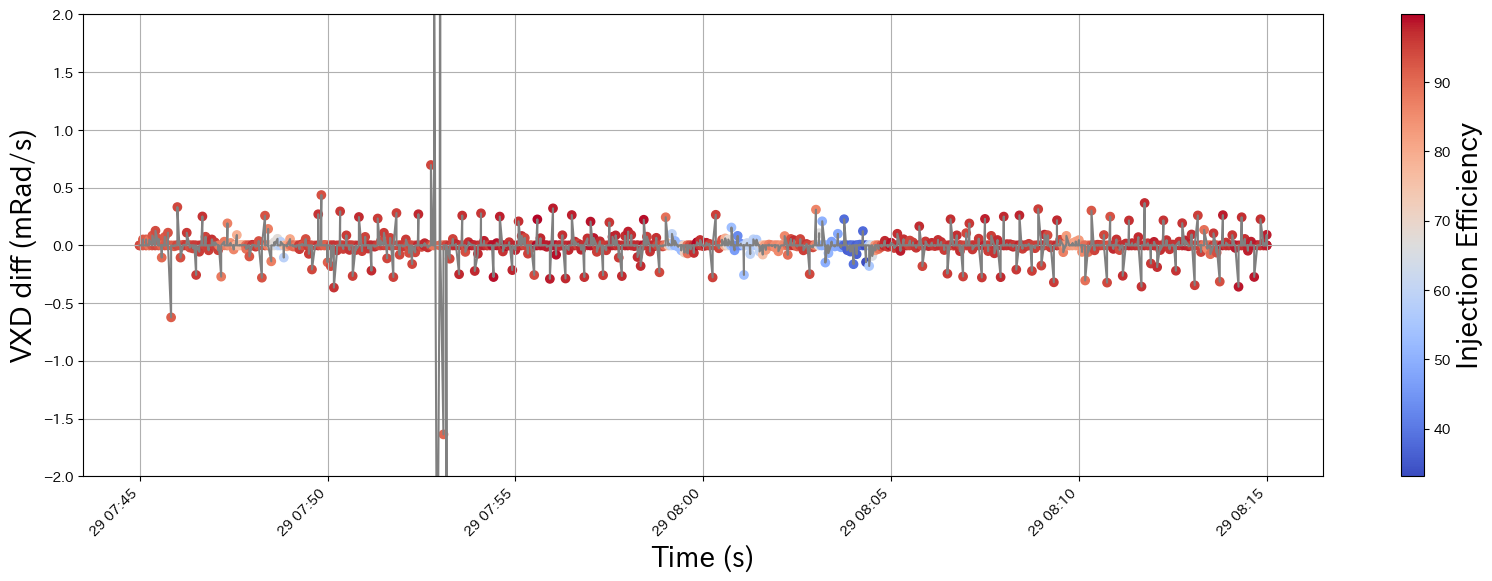

In [ ]:
plt.figure(figsize=(20, 6))

# 点にマーカーをつけずに線のみを引く
plt.plot(df5["Timestamp"], df5["B2_VXD:Rad:Res:BPAtDCU3:A1:DoseRate_Diff"], marker='', linestyle='-', color='gray')

# scatterプロットで、各点に色をつける
plt.scatter(df5["Timestamp"], df5["B2_VXD:Rad:Res:BPAtDCU3:A1:DoseRate_Diff"], c=df5["TM_EVR0:LER:INJ2_EFF:BCM"], cmap="coolwarm", marker='o',)

# 軸ラベルとフォントサイズの設定
plt.xlabel("Time (s)", fontsize=20)
plt.ylabel("VXD diff (mRad/s)", fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.ylim(-2, 2)

# グリッドの表示
plt.grid(True)

# カラーバーの追加
cbar = plt.colorbar(label='Injection Efficiency')
cbar.ax.yaxis.label.set_size(20)  # カラーバーのフォントサイズを設定

# グラフの表示
plt.show()